# Solving systems of linear equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Matrices memo
Book appendix C: matrix, index (row, column, start from $0$), diagonal, transpose, symmetric, inverse, identity.

To create a matrix, use `numpy.array`.

Clarification on matrix multiplication `@` vs element wise multiplication `*`.

Matrix slicing in Python, e.g. `A[:,i], A[i,:], A[:k,i], A[k:,i], A[k:l,i]` ...


In [28]:
M = np.array([[1,2],[3,4],[5,6]])
A = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)
B = A.T  # B=np.transpose(A)
AmB = A@B  # same as np.matmul(A, B) but @ is shorter and let you type the equation as it looks
AeB = A*B
print(M)

[[1 2]
 [3 4]
 [5 6]]


## Motivation

Applications that require solving systems of linear equations (SLE):
- Optimization problems
- Physics based computation and modeling: partial derivative equations are converted into large systems of linear equation to be solved. Systems of *non-linear* equations can also be re-written as systems of linear equations for faster solving.
- ...

**Example: rotation in two dimensions**

A set of points $(x, y)$ can be rotated counter-clock wise through an angle $\theta$ about the origin, producing a new set point of points $(x', y')$. The operation is done through a $2 \times 2$ rotation matrix $\textbf{R}$, such as:

$
\begin{pmatrix}
\cos \theta & -\sin\theta\\
\sin \theta & \cos\theta\\
\end{pmatrix}
\begin{pmatrix}
x\\
y\\
\end{pmatrix}
=
\begin{pmatrix}
x'\\
y'\\
\end{pmatrix}
$

On the other hand. If you know $(x', y')$ and want to rotate your object back to it's original position, then you  can solve this system to get $(x, y)$. 

In [3]:
# Read the rotated data points
x_prime, y_prime = np.loadtxt('rotated.txt')
u_prime = np.array([x_prime, y_prime])

# We're told that the rotation was 120 degrees, counter-clockwise
angle_deg = 120
theta = angle_deg*np.pi/180.0

# And we define the rotation matrix
R = np.array([np.cos(theta), -np.sin(theta), np.sin(theta), np.cos(theta)]).reshape(2,2)
print('Rotation matrix R: \n', R)

Rotation matrix R: 
 [[-0.5       -0.8660254]
 [ 0.8660254 -0.5      ]]


Let's rotate the set of points $\textbf{u'} = (x', y')^{T}$ back to their original positions $\textbf{u} = (x, y)^{T}$ by solving the system of equations described above $\textbf{Ru}=\textbf{u'}$ using the numpy function `np.linalg.solve`.

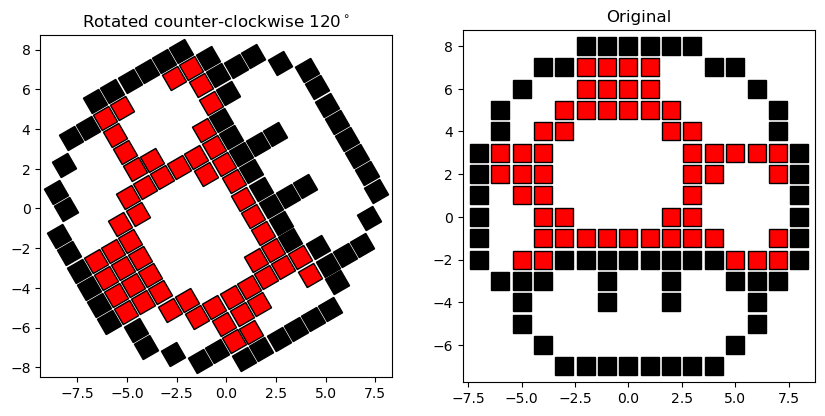

In [4]:
# Find their positions before the rotation
x, y = np.linalg.solve(R, u_prime)

# Figure
#  -- just embellishment -------------------  #
mksz = 18  # markersize
idkr = 60  # index at which the color changes
# and all marker options
#  -----------------------------------------  #
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(x_prime[:idkr], y_prime[:idkr], marker=(4, 0, 45+angle_deg), markersize=mksz, linestyle='None', markeredgecolor='k', color='k')   
ax[0].plot(x_prime[idkr:], y_prime[idkr:], marker=(4, 0, 45+angle_deg), markersize=mksz, linestyle='None', markeredgecolor='k', color='r')
ax[0].set_aspect('equal', 'box')
ax[0].set_title(r'Rotated counter-clockwise {:d}$^\circ$'.format(angle_deg))
ax[1].plot(x[:idkr], y[:idkr], marker=(4, 0, 45), markersize=mksz, linestyle='None', markeredgecolor='k', color='k')
ax[1].plot(x[idkr:], y[idkr:], marker=(4, 0, 45), markersize=mksz, linestyle='None', markeredgecolor='k', color='r')
ax[1].set_aspect('equal', 'box')
ax[1].set_title('Original')
plt.show()

## Make a computer-friendly system
<font color='red'>**Black board:** Get the coefficients matrix from two equations.</font>

## Generalisation
For a large problem with $n$ equations and $n$ unknowns we have

$
\begin{pmatrix}
A_{00} & A_{01} & \cdots & A_{0, n-1}\\
A_{10} & A_{11} & \cdots & A_{1, n-1}\\
\cdots\\
A_{n-1,0} & A_{n-1,1} & \cdots & A_{n-1, n-1}\\
\end{pmatrix}
\begin{pmatrix}
x_0\\
x_1\\
\cdots\\
x_{n-1}\\
\end{pmatrix}=\begin{pmatrix}
b_0\\
b_1\\
\cdots\\
b_{n-1}\\
\end{pmatrix}
$

Which can be written more simply $\textbf{Ax}=\textbf{b}$, where $\textbf{A}$, $\textbf{x}$ and $\textbf{b}$ are the coefficient matrix, unknown and constant vectors, respectively.

Note that the indices range from $0$ to $n-1$ just to be in line with Python indexing, which starts at $0$.

We also introduce the augmented coefficient matrix, that concatenates $\textbf{A}$ and $\textbf{b}$. For some SLE solving methods, using that matrix will reduce the amount of operation needed to solve the system.

$
(\textbf{A}|\textbf{b})=
\left(
\begin{array}{cccc|c}
A_{00} & A_{01} & \cdots & A_{0, n-1} & b_0\\
A_{10} & A_{11} & \cdots & A_{1, n-1} & b_1\\
\cdots\\
A_{n-1,0} & A_{n-1,1} & \cdots & A_{n-1, n-1} & b_{n-1}\\
\end{array}
\right)
$

In [34]:
# Build the augmented matrix
A = np.random.randint(1,10,size=(20,22))
b = np.random.randint(90,99,size=(20,1))

Au = np.concatenate((A, b), axis=1)
print(Au)

[[ 9  3  6  2  3  2  9  5  9  3  4  8  2  7  5  9  1  9  7  4  4  6 90]
 [ 8  2  7  6  9  1  2  3  7  4  5  9  1  6  3  4  9  8  8  1  8  4 94]
 [ 3  7  8  2  3  7  9  6  4  5  5  3  4  2  2  4  4  4  3  6  9  8 94]
 [ 8  6  7  9  1  8  4  6  5  2  8  6  3  2  4  3  4  9  4  8  9  1 94]
 [ 4  9  5  5  2  1  9  5  6  9  3  2  6  9  6  1  9  2  6  3  8  7 92]
 [ 2  4  4  2  2  9  3  1  6  8  2  6  9  7  6  7  3  8  4  8  2  1 98]
 [ 3  2  7  9  6  3  3  5  2  4  9  9  3  1  2  1  7  6  7  3  1  8 91]
 [ 5  8  5  6  2  2  4  5  9  8  3  3  8  2  8  1  7  7  4  4  7  2 90]
 [ 7  8  3  9  6  7  9  6  9  8  5  2  5  1  9  3  2  5  4  8  9  9 91]
 [ 6  6  3  3  4  5  4  3  4  5  4  6  1  3  4  4  8  7  5  9  5  4 91]
 [ 8  9  1  1  9  5  4  9  5  5  7  9  1  4  7  6  5  4  2  6  1  3 94]
 [ 1  9  6  8  5  3  7  9  3  2  7  5  7  9  1  5  2  4  6  9  9  5 98]
 [ 7  6  6  2  5  2  1  5  1  3  4  6  1  9  2  8  5  3  2  8  4  6 93]
 [ 1  5  6  6  9  7  3  5  3  5  7  5  3  7  4  8  5  7  4  2  9

## Error analysis

The point here is not to make an error analysis of any method to solve linear systems of equations but rather to notice, thanks to simple examples, when a system is **ill- or well-conditioned**. This will be done using matrix perturbation theory: add a relatively small change to one element of the coefficient matrix and see if the results remain stable (well-conditioned problem) or not (ill-conditioned problem). Consider this perturbation as equivalent to rounding errors, or measurements uncertainties. 

In each examples, we solve $\textbf{Ax}=\textbf{b}$ (find $\textbf{x}$).

So we start with an example of ill-conditioned problem:

$
(\textbf{A}|\textbf{b})=
\left(
\begin{array}{cc|c}
0.2161 & 0.1441 & 0.1440\\
1.2969 & 0.8648 & 0.8642\\
\end{array}
\right)
$

In [6]:
A = np.array([0.2161, 0.1441, 1.2969, 0.8648]).reshape(2,2)
b = np.array([0.1440, 0.8642]).reshape(2,1)

x = np.linalg.solve(A,b)
print('x =\n',x)

x =
 [[ 2.]
 [-2.]]


Let's now add a small perturbation $p=0.0001$ to the first element in A

In [7]:
# add the perturbation and re-solve
dA = np.array([0.0001, 0, 0, 0]).reshape(2,2)
xp = np.linalg.solve(A+dA,b)
print('x =\n',xp)

x =
 [[-2.31294091e-04]
 [ 9.99653059e-01]]


That is a completely different result from the previous one, despite a very small perturbation!

Another example with simpler coefficients and a perturbation $p=0.001$.

Original system:
$
(\textbf{A}|\textbf{b})=
\left(
\begin{array}{cc|c}
1 & 1 & 2\\
1 & 1.001 & 2.001\\
\end{array}
\right)
$

Perturbed system:
$
(\textbf{A}|\textbf{b})=
\left(
\begin{array}{cc|c}
1 & 1 & 2\\
1 & \textbf{1.002} & 2.001\\
\end{array}
\right)
$

In [8]:
A1 = np.array([1,1,1,1.001]).reshape(2,2)
b1 = np.array([2,2.001]).reshape(2,1)

x1 = np.linalg.solve(A1,b1)
print('Original system:\nx =\n',x1)
print('---')
dA1 = np.array([0, 0, 0, 0.001]).reshape(2,2)
xp1 = np.linalg.solve(A1+dA1,b1)
print('Perturbed system:\nx =\n',xp1)

Original system:
x =
 [[1.]
 [1.]]
---
Perturbed system:
x =
 [[1.5]
 [0.5]]


One can also modify only $\textbf{b}$ such that
$
(\textbf{A}|\textbf{b})=
\left(
\begin{array}{cc|c}
1 & 1 & 2\\
1 & 1.001 & \textbf{2.002}\\
\end{array}
\right)
$

In [9]:
p = 0.001
b1p = np.array([2,2.001 + p]).reshape(2,1)

xp1 = np.linalg.solve(A1,b1p)
print('Perturbed system:\nx =\n',xp1)

Perturbed system:
x =
 [[0.]
 [2.]]


Just take a moment to compare the relative amplitude of the perturbation (compared to the values in $A$ and $b$) and that of the changes in the results.

Does it happen all the time, whenever the inputs are slightly altered? See this new example:

$
(\textbf{A}|\textbf{b})=
\left(
\begin{array}{cc|c}
2 & 1 & 2\\
1 & 2 & 7\\
\end{array}
\right)
$

In [10]:
A2 = np.array([2.,1,1,2]).reshape(2,2)
b2 = np.array([2,7]).reshape(2,1)

x2 = np.linalg.solve(A2,b2)
print(x2)
print('---')
print('Add again a small perturbation p=0.01 on A[1,1]')
dA2 = np.array([0, 0, 0.01, 0]).reshape(2,2)
xp2 = np.linalg.solve(A2+dA2,b2)
print(xp2)

[[-1.]
 [ 4.]]
---
Add again a small perturbation p=0.01 on A[1,1]
[[-1.00334448]
 [ 4.00668896]]


Now the difference between the two results is:

In [11]:
print('{:.2f}% and {:.2f}%'.format( ((x2[0]-xp2[0])/x2[0]*100)[0], ((x2[1]-xp2[1])/x2[1]*100)[0]))

-0.33% and -0.17%


**So how can we know if our system will be sensitive or not to perturbation, before trying to solve it?**

Answer: Use the coefficient matrix $\textbf{A}$ to compute a _condition number_ $\kappa(\textbf{A})$ defined as:

$\kappa(\textbf{A}) = \|\textbf{A}\|\|\textbf{A}^{-1}\|$

You can get the norm of $\textbf{A}$ using ```np.linalg.norm(A)``` and the inverse of $\textbf{A}$ using ```np.linalg.inv(A)```. There several formulas for the norm, here we only consider the Euclidean (also called Frobenius) norm.

With that, let's see what we get for the three systems we studied above:

In [12]:
print('A : {:.2f}'.format(np.linalg.norm(A)*np.linalg.norm(np.linalg.inv(A))))
print('A1: {:.2f}'.format(np.linalg.norm(A1)*np.linalg.norm(np.linalg.inv(A1))))
print('A2: {:.2f}'.format(np.linalg.norm(A2)*np.linalg.norm(np.linalg.inv(A2))))

A : 249729267.04
A1: 4002.00
A2: 3.33


A large condition number, usually $>100$,  means the system is ill-conditioned and a low condition number means that the system is well-conditioned.

## Solving system of linear equations $\textbf{Ax}=\textbf{b}$

### If the coefficients matrix is triangular 

This may look like a very specific case yet general solution for non triangular matrices will involve decomposition into such triangular matrices first.
Let's take these systems:

Lower triangular
$
\begin{pmatrix}
L_{00} & 0 & 0 \\
L_{10} & L_{11} & 0\\
L_{20} & L_{21} & L_{22}\\
\end{pmatrix}
\begin{pmatrix}
x_0\\
x_1\\
x_2\\
\end{pmatrix}=
\begin{pmatrix}
b_0\\
b_1\\
b_2\\
\end{pmatrix}
$

Upper triangular
$
\begin{pmatrix}
U_{00} & U_{01} & U_{02} \\
0 & U_{11} & U_{12}\\
0 & 0 & U_{22}\\
\end{pmatrix}
\begin{pmatrix}
x_0\\
x_1\\
x_2\\
\end{pmatrix}=
\begin{pmatrix}
b_0\\
b_1\\
b_2\\
\end{pmatrix}
$

<font color='red'>**Black board:** Derive the solution by hand and figure out the general solution</font>

Thus:

Solve lower triangular systems by **Forward substitution** $$ x_i = \left(b_i - \sum_{j=0}^{i-1}{L_{ij}x_j} \right)\frac{1}{L_{ii}}, \quad i=0,\cdots,n-1 \quad i\mathrm{\:goes\:forward}$$ 

Solve upper triangular systems by **Back substitution** $$ x_i = \left(b_i - \sum_{j=i+1}^{n-1}{U_{ij}x_j} \right)\frac{1}{U_{ii}}, \quad i=n-1,\cdots,0 \quad i\mathrm{\:goes\:backward\:!}$$

Let's implement that in Python, first setting up the system:

In [13]:
# create some matrix A and input b
val = 21
n = 4
A = np.arange(val,val+n*n).reshape(n,n)
A = np.sqrt(A)
b = (A[0,:])**2.1

# create lower and upper triangular matrices using the functions np.tril and np.triu
L = np.tril(A)
U = np.triu(A)

Then coding the forward substitution

In [14]:
# Forward substitution
x = np.zeros(n) # initialise result array
for i in range(n):
    # do the summation first
    s = 0
    for j in range(i):
        s = s + L[i,j]*x[j]
    # then plug it into the formula
    x[i] = (b[i] - s)/L[i,i]
print('Check the results')
print('Lx = b: {:}'.format(np.allclose(L@x, b)))

Check the results
Lx = b: True


Notice the operator `@` for doing a matrix multiplication (equivalent to `np.matmul`).

One can considerably shorten the code

In [15]:
xl = np.zeros(n) # initialise result array

for i in range(n):
    xl[i] = (b[i] - L[i,:i]@xl[:i])/L[i,i]

print('Lx = b: {:}'.format(np.allclose(L@xl, b)))

Lx = b: True


Same idea with the back substitution, but indices go backward (from $n-1$ to $0$) 

In [16]:
# Back substitution
xu = np.zeros(n) # initialise result array
for i in reversed(range(n)):
    xu[i] = (b[i] - U[i,i+1:]@xu[i+1:])/U[i,i]
print('Ux = b: {:}'.format(np.allclose(U@xu, b)))

Ux = b: True


In [17]:
# let's just define the functions:

def forwsub(L, b):
    n = np.size(b)
    xl = np.zeros(n) # initialise result array
    for i in range(n):
        xl[i] = (b[i] - L[i,:i]@xl[:i])/L[i,i]
    return xl


def backsub(U, b):
    n = np.size(b)
    xu = np.zeros(n) # initialise result array
    for i in reversed(range(n)):
        xu[i] = (b[i] - U[i,i+1:]@xu[i+1:])/U[i,i]
    return xu

### Gaussian elimination method

This is where the augmented coefficient matrix described above becomes interesting. The idea is to perform linear combinations of the rows in order to transform the coefficient matrix $\textbf{A}$ into an upper triangular matrix. Note that the linear combination also changes the vector $\textbf{b}$. Once we get an upper triangular matrix, we can solve the system by back substitution.

**Principle**: replace a row $i$ with that same row plus another row $j$ (the pivot row) times a coefficient. The coefficient is selected such that after the transformation the leading number in row $i$ is a $0$. This will eventually create an upper triangular matrix.

<font color='red'>**Black board:** get the idea on a simple $3 \times 3$ matrix</font>


For the general case

$
(\textbf{A}|\textbf{b})=
\left(
\begin{array}{cccc|c}
A_{00} & A_{01} & \cdots & A_{0, n-1} & b_0\\
A_{10} & A_{11} & \cdots & A_{1, n-1} & b_1\\
\cdots\\
A_{n-1,0} & A_{n-1,1} & \cdots & A_{n-1, n-1} & b_{n-1}\\
\end{array}
\right)
$

We need to implement:

$$\mathrm{new\,row\,} i = \mathrm{row\,} i - \frac{A_{ij}}{A_{jj}} \mathrm{row\,} j$$

where $j = 0, \cdots, n-2$ and $i = j+1, \cdots, n-1$

In [18]:
# Gaussian elimination and solving
def gauel(A, b):
    n = np.shape(A)[0]
    AA = np.concatenate((A,b.reshape(n,1)), axis=1)
    for j in range(n-1):
        for i in range(j+1, n):
            AA[i,:] = AA[i,:] - AA[i,j]/AA[j,j]*AA[j,:]
            # more efficient: 
            # AA[i,j:] = AA[i,j:] - AA[i,j]/AA[j,j]*AA[j,j:]
    Aok = AA[:,:n]
    bok = AA[:, n]
    return Aok, bok

def gauelsolve(A, b):
    At, bt = gauel(A, b)
    # Back sub
    x = backsub(At, bt)
    return x

xu = gauelsolve(A, b)
print(xu)
print('Same results as np.linalg.solve: {:}'.format(np.allclose(xu, np.linalg.solve(A, b))))

[ 17118.9554009  -55069.99934969  58822.07580723 -20866.39246612]
Same results as np.linalg.solve: True


### LU-method

One issue with the Gaussian elimination: suppose you change only $\textbf{b}$, then you still need to redo the entire process, yet applying the same operations on $\textbf{A}$. The LU method will clear this issue. It makes use over lower ($\textbf{L}$) and upper ($\textbf{U}$) triangular matrices. We will also assume that the diagonal elements of $\textbf{L}$ are equal to $1$.

<font color='red'>**Black board:** Overview of the method. Then "derive" the LU decomposition. </font>

Thus: Doing a Gaussian elimination on $\textbf{A}$ returns $\textbf{U}$, while storing the coefficients used in the Gaussian eliminations returns $\textbf{L}$.

In [19]:
def ludec(A):
    U = A.copy()
    n = np.shape(U)[0]
    L = np.zeros([n, n])
    np.fill_diagonal(L, 1)
    for j in range(n-1):
        for i in range(j+1, n):
            coef =  U[i,j]/U[j,j]
            U[i,:] = U[i,:] - coef*U[j,:]
            L[i, j] = coef # save the coef in L: this is the main difference with the Gaussian elimination
    return L, U

L, U = ludec(A)
print('A = LU: {:}'.format(np.allclose(A, L@U)))

A = LU: True


Now we can use that decomposition and the properties of SLE that involve triangular coefficient matrices

In [20]:
def lusolve(A, b):
    L, U = ludec(A)
    y = forwsub(L, b)
    x = backsub(U, y)
    return x

x = lusolve(A, b)
print('Same result as numpy: {:}'.format(np.allclose(x, np.linalg.solve(A, b))))

Same result as numpy: True


Question: For system with $n$ equations and $n$ unknowns, how many $n \times n$ matrices do you need:
- with the Gaussian elimination?
- with LU-method?

Any idea to balance that?

### Pivoting / Partial pivoting

The previous methods may still get us into some troubles. Consider this system:
$$
(\textbf{A}|\textbf{b}) = \left(
\begin{array}{ccc|c}
2 & 1 & 1 & 8\\
2 & 1 & -4 & -2\\
1 & 2 & 1 & 2\\
\end{array}
\right)
$$

Condition number $= 6.20 $

<font color='red'>**Black board:** Proceed with Gaussian elimination. </font>

The Gaussian elimination fails because the coefficient contains a division by $0$.

In [21]:
# this case returns NAN
A = np.array([2.,1,1,2,1,-4,1,2, 1]).reshape(3,3)
b = np.array([8, -2, 2]).reshape(3,1)

# this case returns a wrong solution
#A = np.array([1e-20, -1, 1, 1]).reshape(2,2)
#b = np.array([1, 2]).reshape(2,1)
# print(np.linalg.norm(A)*np.linalg.norm(np.linalg.inv(A)))

x = gauelsolve(A, b)
print(x)

[nan nan nan]


C:\Users\maxime\AppData\Local\Temp\ipykernel_11080\3523389463.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  AA[i,:] = AA[i,:] - AA[i,j]/AA[j,j]*AA[j,:]
C:\Users\maxime\AppData\Local\Temp\ipykernel_11080\3523389463.py:7: RuntimeWarning: invalid value encountered in multiply
  AA[i,:] = AA[i,:] - AA[i,j]/AA[j,j]*AA[j,:]
C:\Users\maxime\AppData\Local\Temp\ipykernel_11080\1816118634.py:15: RuntimeWarning: invalid value encountered in double_scalars
  xu[i] = (b[i] - U[i,i+1:]@xu[i+1:])/U[i,i]


A solution to this problem is to interchange the rows of the matrix to not have a problematic coefficient in the Gaussian elimination. Basically, $A_{jj}$ (please refer to the section "Gaussian elimination") must not be $0$ or extremely small. Practically, say we are in process of Gaussian elimination, working on red elements of the $j^{th}$ column, we have this system:
$$
\left(
\begin{array}{ccccccc|c}
A_{00} & A_{01} & A_{02} & \cdots & A_{0j} & \cdots & A_{0,n-1} & b_0\\
0      & A_{11} & A_{12} & \cdots & A_{1j} & \cdots & A_{1,n-1} & b_1\\
0      &      0 & A_{22} & \cdots & A_{2j} & \cdots & A_{2,n-1} & b_2\\
\vdots & \vdots & \vdots & \ddots & \vdots & \ddots & \vdots    & \vdots \\
0      &      0 & 0      & \cdots & \color{red}{A_{jj}}    & \cdots & A_{j,n-1} & b_j\\
0      &      0 & 0      & \cdots & \color{red}{A_{j+1,j}} & \cdots & A_{j+1,n-1} & b_{j+1}\\
\vdots & \vdots & \vdots & \ddots & \color{red}{\vdots}    & \ddots & \vdots    & \vdots \\
0      &      0 & 0      & \cdots & \color{red}{A_{ij}}    & \cdots & A_{i,n-1} & b_i\\
\vdots & \vdots & \vdots & \ddots & \color{red}{\vdots}    & \ddots & \vdots    & \vdots \\
0      &      0 & 0      & \cdots & \color{red}{A_{n-1,j}} & \cdots & A_{n-1,n-1} & b_{n-1}\\
\end{array}
\right)
$$
Partial pivoting (or row interchanging) means we look for the row index $k$ such that $$|{A_{k,j}}| =\max_{j\leq i\leq n-1} |{A_{i,j}}| $$ and, once found, we interchange the rows $k$ and $j$.

In [22]:
A = np.array([2.,1,1,2,1,-4,1,2, 1]).reshape(3,3)
b = np.array([8, -2, 2]).reshape(3,1)

def gauel_solve_pivot(A, b):
    n = np.shape(A)[0]
    AA = np.concatenate((A,b.reshape(n,1)), axis=1)
    for j in range(n-1):
        # this is new compared to gauel #
        k = np.argmax(np.abs(AA[j:,j])) + j # needs "+ j" because the search starts at j
        if k != j:  # else there is no need to swap
            temp = AA[j,:].copy()
            AA[j,:] = AA[k, :]
            AA[k,:] = temp
            # or AA[j,:], AA[k,:] = AA[k, :], AA[j,:].copy()
        # ----------------------------- #
        for i in range(j+1, n):
            AA[i,:] = AA[i,:] - AA[i,j]/AA[j,j]*AA[j,:]
    Aok = AA[:,:n]
    bok = AA[:, n]
    x = backsub(Aok, bok)
    return x

x = gauel_solve_pivot(A, b)
print('Same result as numpy: {:}'.format(np.allclose(x.reshape(np.shape(A)[0], 1), np.linalg.solve(A, b))))

Same result as numpy: True


Let's just compare the results of the Gaussian elimination without ($x_1$) and with ($x_2$) partial pivoting to the results of `np.linalg.solve` ($x_3$):

In [23]:
# create matrix A and input b
val = 21
n = 4
A = np.arange(val,val+n*n).reshape(n,n)
A = np.sqrt(A)
b = (A[0,:])**2.1

# compare
x1 = gauelsolve(A, b)
x2 = gauel_solve_pivot(A, b)
x3 = np.linalg.solve(A, b)

print('Difference gaussian elim vs np.linalg.solve =', x1-x3)
print('Difference gaussian elim with partial pivot vs np.linalg.solve =', x2-x3)

Difference gaussian elim vs np.linalg.solve = [-4.97870533e-05  1.57672970e-04 -1.66130303e-04  5.82435823e-05]
Difference gaussian elim with partial pivot vs np.linalg.solve = [ 1.00599718e-05 -3.18304446e-05  3.35094737e-05 -1.17388481e-05]


Gaussian elimination with partial pivoting returns results that are closer to that from `np.linalg.solve`. 

But, can you still find a flow in the method above?

Consider this system
$$
(\textbf{A}|\textbf{b}) = \left(
\begin{array}{cc|c}
10^{-20} & -1 & 1\\
10^{-20} & 10^{-20} & 2\ 10^{-20}\\
\end{array}
\right)
$$

In [24]:
A = np.array([1e-20, -1, 1e-20, 1e-20]).reshape(2,2)
b = np.array([1, 2e-20])

xa = gauel_solve_pivot(A, b)
xb = np.linalg.solve(A, b)

print(xa)
print(xb)

[ 0. -1.]
[ 0. -1.]


Wrong solution (even with `np.linalg.solve`).

The solution is to do the partial pivoting using the pivot that has the largest relative magnitude, relative to the other elements in the same row (not just the largest value in the column as we did before).

<font color='red'>**Black board:** Explain what that means. </font>

In [25]:
A = np.array([1e-20, -1, 1e-20, 1e-20]).reshape(2,2)
b = np.array([1, 2e-20])

def gauel_solve_scaledpivot(A, b):
    n = np.shape(A)[0]
    # note: no concat A and b here because the scaling is done relative to row elements of A 
    for j in range(n):
        # this is new compared to gauel_solve_pivot #
        sm = np.amax(np.abs(A[j:,:]), axis=1) # maximum of each row: check all the columns in each row
        k = np.argmax(np.abs(A[j:,j])/sm) + j
        if k != j:  # else there is no swap
            temp = A[j,:].copy()
            A[j,:] = A[k, :]
            A[k,:] = temp
            # or A[j,:], A[k,:] = A[k, :], A[j,:].copy()
            b[j], b[k] = b[k], b[j]
        # ----------------------------- #
        for i in range(j+1, n):
            A[i,:] = A[i,:] - A[i,j]/A[j,j]*A[j,:]
    x = backsub(A, b).reshape(n,1)
    return x

x = gauel_solve_scaledpivot(A, b)
print(x)

[[ 3.]
 [-1.]]


Now we get the right solution.

### Jacobi
Always the same system $\textbf{Ax} = \textbf{b}$ but we use an _iterative_ method to solve it.

Iterative method: Starts from a guess $x$ given by you, then the method tries to refine this guess one step (iteration) after another. It means that a new $x$ is computed at each iteration and the iteration stops when the previous and the new $x$ are close to each other: $x$ has converged toward a stable value. This is a slower method than the previous ones except when dealing with large sparse matrices (matrices with many elements being zeros).

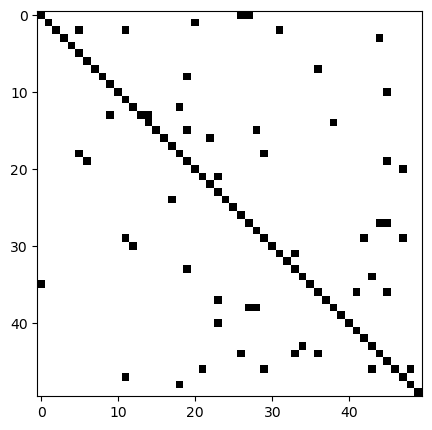

2


In [26]:
# example dummy sparse matrix
z = 50
S = np.identity(z)
S[np.random.randint(z, size=z), np.random.randint(z, size=z)] = 1
fig, ax = plt.subplots(1,1,figsize=(5, 5))
ax.imshow(S, cmap="gray_r")
plt.show()
print(np.int64(np.floor(np.sqrt(6))))

Let's rewrite $\textbf{Ax} = \textbf{b}$ as 
$
\sum_{j=0}^{j=n-1}A_{ij}x_j = b_i
$

<font color='red'>**Black board:** Derive the method. </font>

So we must code:

$$
x_i^{(k)} = \left(b_i-
\sum_{j=0}^{j=i-1}A_{ij}x_j^{(k-1)} - 
\sum_{j=i+1}^{j=n-1}A_{ij}x_j^{(k-1)}
\right)\frac{1}{A_{ii}}, \quad i=0, 1, \cdots, n-1
$$

where $x_i^{(k)}$ means $x_i$ at the $k^{th}$ iteration. The only $k$ where this is impossible to compute is $k=0$ ($0^{th}$ iteration is meaningless). So one must make an initial guess for $x^{(0)}$.

iteration: 05 -> Relative difference x(5) vs x(4) = 9.7e-01
iteration: 10 -> Relative difference x(10) vs x(9) = 7.1e-02
iteration: 15 -> Relative difference x(15) vs x(14) = 5.9e-03
iteration: 20 -> Relative difference x(20) vs x(19) = 4.8e-04
iteration: 25 -> Relative difference x(25) vs x(24) = 4.0e-05
iteration: 30 -> Relative difference x(30) vs x(29) = 3.2e-06
iteration: 35 -> Relative difference x(35) vs x(34) = 2.7e-07
iteration: 40 -> Relative difference x(40) vs x(39) = 2.2e-08
iteration: 45 -> Relative difference x(45) vs x(44) = 1.8e-09
iteration: 50 -> Relative difference x(50) vs x(49) = 1.5e-10
iteration: 55 -> Relative difference x(55) vs x(54) = 1.2e-11
iteration: 60 -> Relative difference x(60) vs x(59) = 9.8e-13 - Convergence criterion reached


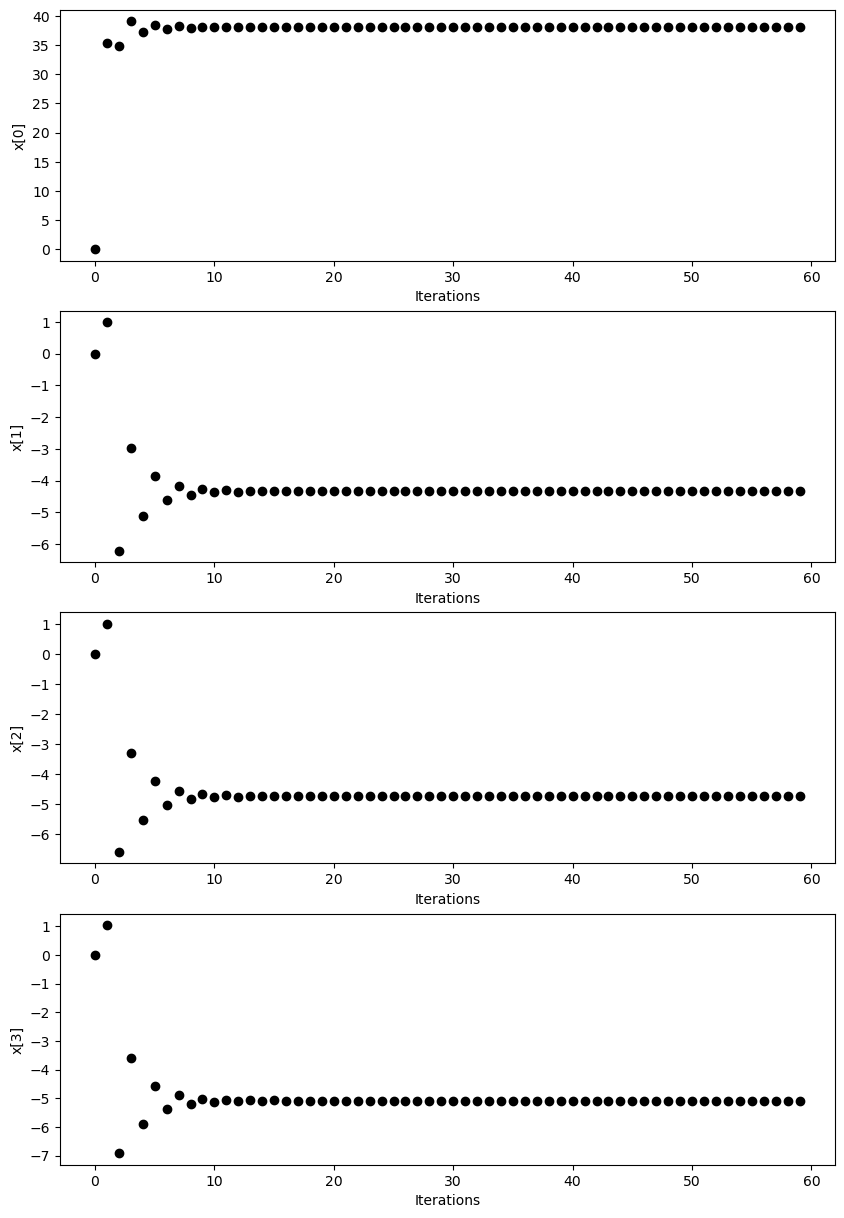

In [27]:
# create matrix A and input b
val = 21
n = 4
A = np.arange(val,val+n*n).reshape(n,n)
A = np.sqrt(A)
A += val*np.identity(n)
b = (A[0,:])**2.1

# Jacobi
def jacobi(A, b, xg):
    n = np.shape(A)[0]
    xold = np.zeros(n) + xg
    xnew = np.zeros(n)
    rer = 1e5
    eps = 1e-12
    it = 0
    fig, ax = plt.subplots(n, 1, figsize=(10, 15))
    while rer>eps and it<100:
        for k in range(n):
            ax[k].plot(it, xnew[k], 'ko')
            ax[k].set_xlabel('Iterations')
            ax[k].set_ylabel('x[{:d}]'.format(k))
        if not it%5 and it!= 0:
            print('iteration: {:02d} -> Relative difference x({:d}) vs x({:d}) = {:.1e}'.format(it, it, it-1, rer))
        # Most important part: the iteration on x
        for i in range(n):
            xnew[i] = (b[i] - np.sum(A[i,:i]*xold[:i]) -  np.sum(A[i,i+1:]*xold[i+1:]) ) * 1/A[i,i] # equation in the previous cell
        rer = np.sum(np.abs((xnew-xold)/xnew))
        xold = xnew.copy()
        it += 1
        # ---------------------------------------
        if rer<=eps:
            print('iteration: {:02d} -> Relative difference x({:d}) vs x({:d}) = {:.1e} - Convergence criterion reached'.format(it, it, it-1, rer))
    return xnew

x = jacobi(A, b, 0.)